In [2]:
import pandas as pd

In [3]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

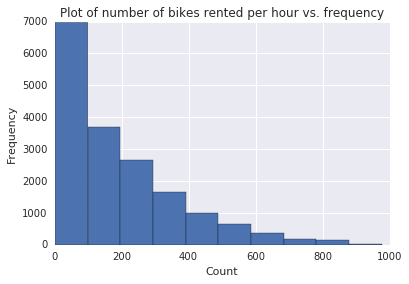

In [6]:
%matplotlib inline
plt.hist(x='cnt',data=bike_rentals)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Plot of number of bikes rented per hour vs. frequency');

In [7]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [8]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    else:
        return 4

In [9]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [10]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


I would use something like Root Mean Square Error to evaluate my model's performance. This is a Regression problem since 'cnt' contains many different values, not just a few categories like a classification problem would include.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = bike_rentals.drop(['cnt','casual','dteday','registered'],axis=1)

In [13]:
y = bike_rentals['cnt']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
preds = lm.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
from math import sqrt

In [21]:
sqrt(mean_squared_error(y_test, preds))

130.86617571747414

RMSE seems to be a bit high at 130.87, considering the true values go from 0 to 1000.

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dtr = DecisionTreeRegressor(min_samples_leaf=8)

In [24]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [25]:
preds = dtr.predict(X_test)

In [26]:
sqrt(mean_squared_error(y_test,preds))

50.37307404486591

RMSE is much lower with the DecisionTreeRegressor, at 50.29. This is the lowest value I could get after adjusting the min_sample_leaf hyperparameter from its default of 1 to 8.

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor(min_samples_leaf=2)

In [29]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [30]:
preds = rfr.predict(X_test)

In [31]:
sqrt(mean_squared_error(y_test,preds))

41.79604314185003

RandomForestRegressor is doing the best out of the three models. After adjusting the min_sample_leaf hyperparameter from its default of 1 to 2, the RMSE comes out to be 42.26 which is a big difference from the RMSE of LinearRegression of 130.87.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param = {'n_estimators':[1,50,100,150,200]}

In [41]:
gsc = GridSearchCV(RandomForestRegressor(),param_grid=param)

In [42]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
gsc.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [43]:
preds = gsc.predict(X_test)

In [44]:
sqrt(mean_squared_error(y_test,preds))

40.642861599266276